In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit


In [75]:
paths = [
    {'path': '/home/aaristov/Multicell/SGR/Timelapse_09061020_2x10-3_8ngml/Timelapse_09062020_2x10-2_8ngml_data.csv',
     'column': 'No_cells'
    },
    {'path': '/home/aaristov/Multicell/SGR/Timelapse_10062020_2x10-3_8ngml/Timelapse_10062020_2x10-2_8ngml_data.csv',
     'column': 'No_cells'
    },
    {'path': '/home/aaristov/Multicell/SGR/20200805-Control_1.2cellsperdrop/0805-control/202008Control_confocal.csv',
     'column': 'No_cells'
    },
    {'path': '/home/aaristov/Multicell/SGR/20200807-CIPRO-7ngml-rep1_1.2_cellsperdrop/20200807-CIPRO-7ngml_single cell data.csv',
     'column': 'ncells'
    },
    {'path': '/home/aaristov/Multicell/SGR/20200811-CIPRO-7ngml-rep2_1.2_cellsperdrop/202008011-CIPRO-7ngml.CSV.csv',
     'column': 'ncells'
    },
    {'path': '/home/aaristov/Multicell/SGR/20200813-CIPRO-7ngml-rep3_1.2_cellsperdrop/202008013-CIPRO-7ngml_.CSV.csv',
     'column': 'ncells'
    },
    
]

In [76]:
fstates = ['Final_state', 'Final state', 'final_state']

In [118]:
def get_hist(path:dict, max_value=8):
    p , c = path.values()
    vector = np.arange(max_value)
    bins = np.linspace(0, max_value, num=max_value + 1)
    
    df = pd.read_csv(p, index_col=None)
    state_col = list(filter(lambda x: 'state' in x, df.columns))[0]
    states  = df[state_col].unique()
    print(f'{state_col}: {states}')
    
    n = len(df.query(f'{c} >= 0'))
    
    fig, ax = plt.subplots(dpi=150)
    
    df[c].hist(
        ax=ax,
        bins=vector - 0.25, 
        width=0.5, 
        grid=False, 
        label=f'total number of droplets'
    )
    ax.set_title(p.split('/')[-1].split('.')[0])
    
    plt.bar(
        vector+.1, 
        [len(df.query(f'{c} == {i}').query(f'`{state_col}` == 1')) for i in vector], 
        color='tab:orange', 
        width=.5, 
        label='number of positive droplets'
    )
    
    hist, bins= np.histogram(df[c].values, bins=bins-0.25, density=True)
    popt, pcov = curve_fit(poisson.pmf, vector, hist, p0=(1.,))
    l = popt[0]
    plt.plot(vector, n * poisson.pmf(vector, l), '.-', label=f'Poisson fit λ={l:.1f}', color='tab:red')
    plt.xlabel('Initial number of cells')
    plt.legend()
    plt.show()
    return ax

<Figure size 900x600 with 0 Axes>

Final_state: [ 0  1 -1]


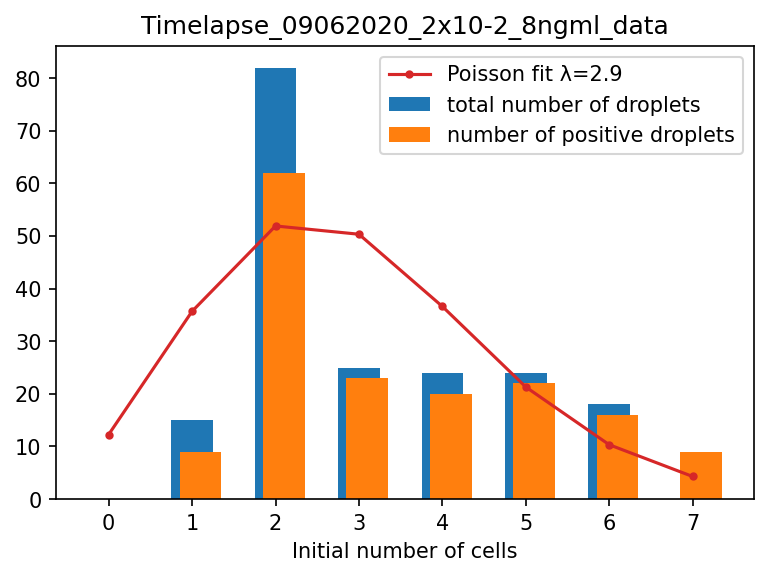

Final_state: [1 0]


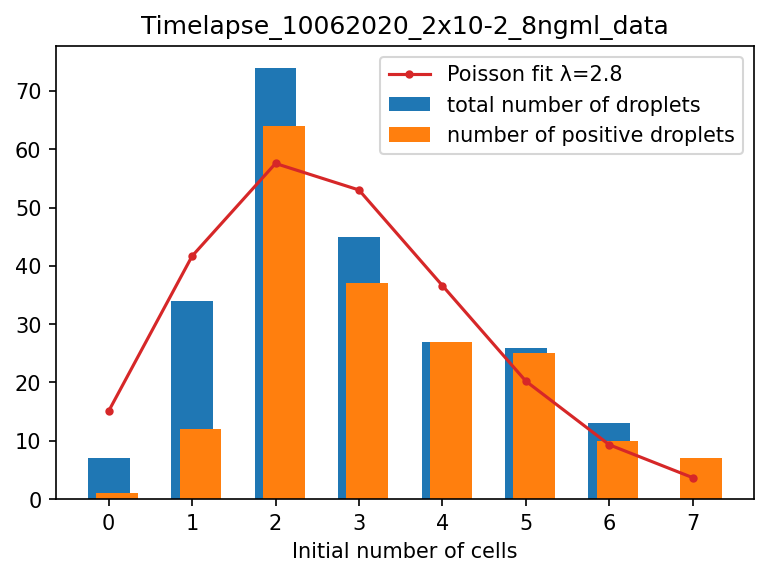

Final state: [ 0  1 -2]


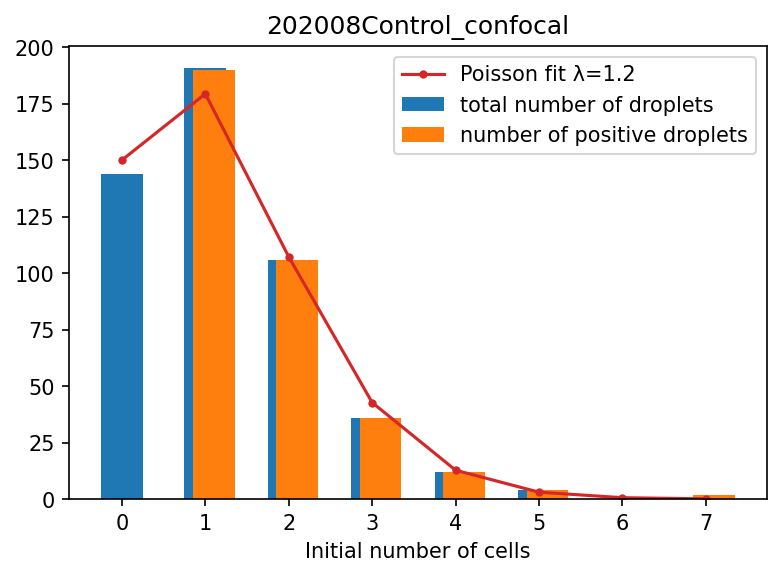

final_state: [1 0]


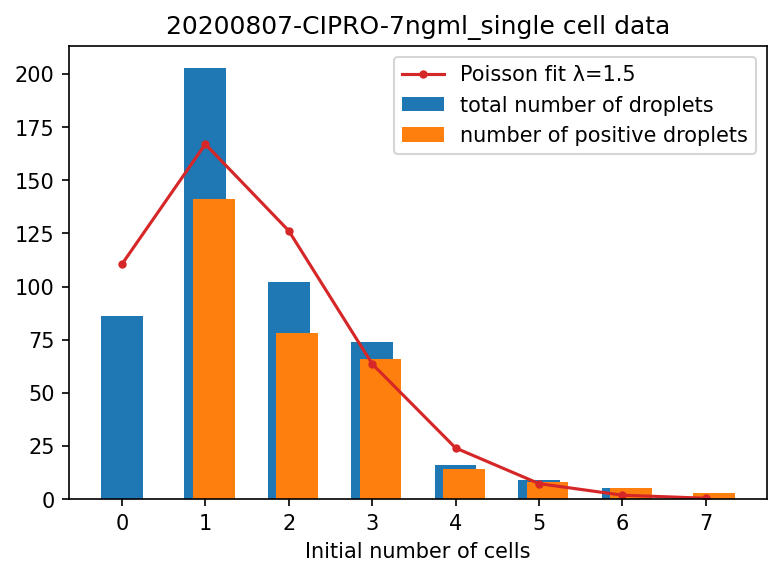

final_state: [ 1  0 -3]


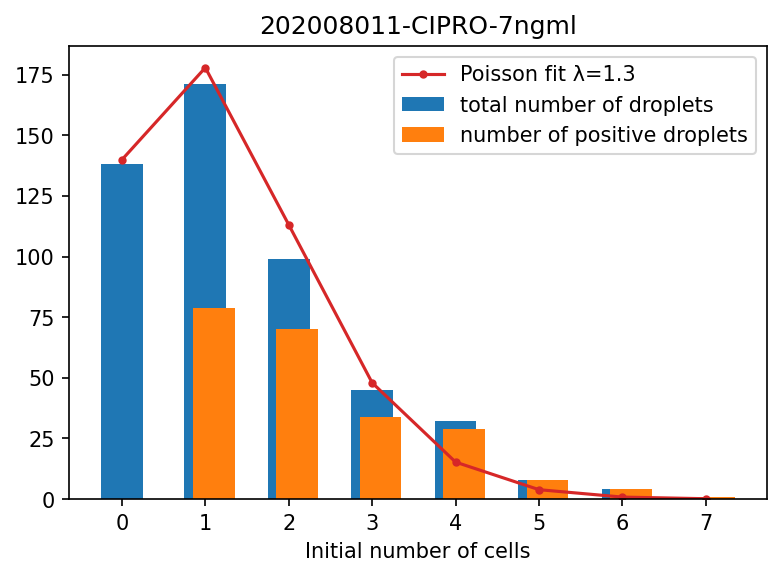

final_state: [1 0]


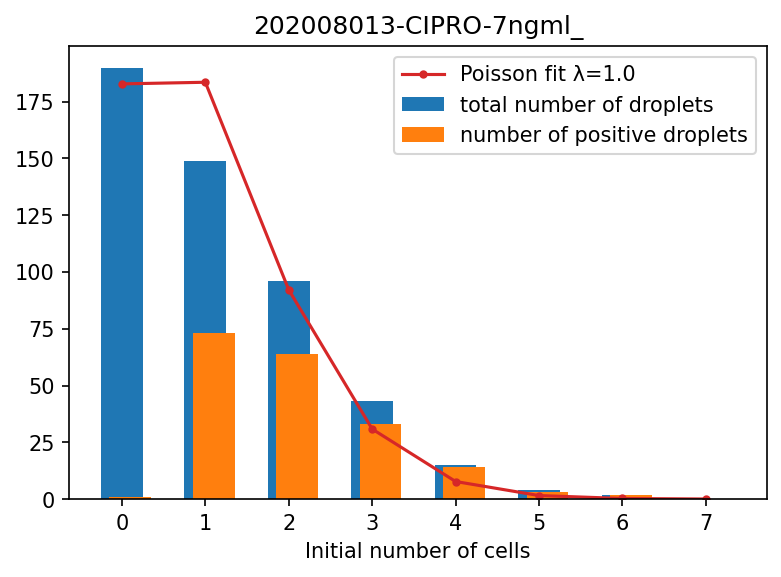

In [119]:
[get_hist(p) for p in paths]